# Theta90 Plotting

## IMPORT MODULES

In [1]:
## MAKE MATPLOTLIB INLINE
%matplotlib inline

## IMPORT OS
import os

## IMPORT NUMPY
import numpy as np  # Used to do math functions

## FUNCTION TO SAVE AND LOAD PICKLE FILES
from sam_analysis.core.pickles import load_pkl

## IMPORT PLOTTING TOOLS
from sam_analysis.plotting.plots import plot_line_points

## SET PATHS AND LOAD DATA

In [2]:
## WORKING DIRECTORY
project_dir = r"/home/bdallin/python_projects/sam_analysis/sam_analysis"
data_dir    = "raw_data"

## DATA FILE
data_pkl = r"unbiased_data.pkl"

## FIGURE PATHS
manuscript_dir = r"/mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams"
figure_dir     = r"figures"

## LOAD DATA
path_data_pkl = os.path.join( project_dir, data_dir, data_pkl )
raw_data      = load_pkl( path_data_pkl )

LOADING PKL FILE...
LOADED PKL FROM /home/bdallin/python_projects/sam_analysis/sam_analysis/raw_data/unbiased_data.pkl



## COMPILE DATA TO PLOT

In [3]:
## SAMS
sam_labels = [   
#                ## SINGLE COMPONENTS 
#                "CH3", "NH2", "CONH2", "OH",
#                ## NH2 CHARGE SCALED
#                "CS0.0NH2", "CS0.1NH2", "CS0.2NH2", "CS0.3NH2", "CS0.4NH2", "CS0.5NH2",
#                "CS0.6NH2", "CS0.7NH2", "CS0.8NH2", "CS0.9NH2", "NH2",
#                ## CONH2 CHARGE SCALED
#                "CS0.0CONH2", "CS0.1CONH2", "CS0.2CONH2", "CS0.3CONH2", "CS0.4CONH2", "CS0.5CONH2",
#                "CS0.6CONH2", "CS0.7CONH2", "CS0.8CONH2", "CS0.9CONH2", "CONH2",
#                ## OH CHARGE SCALED
#                "CS0.0OH", "CS0.1OH", "CS0.2OH", "CS0.3OH", "CS0.4OH", "CS0.5OH",
#                "CS0.6OH", "CS0.7OH", "CS0.8OH", "CS0.9OH", "OH",
               ## NH2 MIXED COMPOSITION
               [ "CH3", "MIX25NH2", "MIX40NH2", "MIX50NH2", "MIX75NH2", "NH2", ],
               ## CONH2 MIXED COMPOSITION
               [ "CH3", "MIX25CONH2", "MIX40CONH2", "MIX50CONH2", "MIX75CONH2", "CONH2", ],
               # OH MIXED COMPOSITION
               [ "CH3", "MIX25OH", "MIX40OH", "MIX50OH", "MIX75OH", "OH", ],
#                ## NH2 SEPARATED COMPOSITION
#                [ "CH3", "SEP25NH2", "SEP40NH2", "SEP50NH2", "SEP75NH2", "NH2", ],
#                ## CONH2 SEPARATED COMPOSITION
#                [ "CH3", "SEP25CONH2", "SEP40CONH2", "SEP50CONH2", "SEP75CONH2", "CONH2", ],
#                # OH SEPARATED COMPOSITION
#                [ "CH3", "SEP25OH", "SEP40OH", "SEP50OH", "SEP75OH", "OH", ],
                ]

## ANALYSIS TYPES
"""
X LABEL:
None

Y LABEL:
"hbonds_sam_sam",
"hbonds_sam_water_per_water",
"hbonds_water_water",
"hbonds_total",
"""

## Y DATA LABELS
y_label    = "hbonds_sam_sam"

## CREATE PLACEHOLDERS
y      = []
yerr   = []
fit    = []

## POINT LABELS
labels = [ "Mix. NH2", "Mix. CONH2", "Mix. OH" ]
# labels = [ "Sep. NH2", "Sep. CONH2", "Sep. OH" ]

## X VALUES
x = [ np.array([ 0.0, 0.25, 0.40, 0.50, 0.75, 1.0 ]) ]
# x = [ np.array([ 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 ]) ]*len(labels)

## LOOP THROUGH SAMS
for gg in sam_labels:
    yt    = []
    yterr = []
    ft    = []
    for ll in gg:
        y_data = raw_data[ll][y_label]

        ## COMPUTE STATISTICS
        yy    = y_data.mean()
        yyerr = y_data.std()
        

        ## APPEND RESULTS
        yt.append( yy )
        yterr.append( yyerr )

    ## APPEND
    y.append( yt )
    yerr.append( yterr )

    ## COMPUTE FIT LINE
    p = np.polyfit( x[0], yt, 2 )
    nx = np.linspace( x[0][0], x[0][-1], 20 )
    ny = np.polyval( p, nx )
    fit.append( [ nx, ny ] )



--- CREATING LINE PLOT WITH POINTS ---
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/sam_sam_number_hbonds_mixed


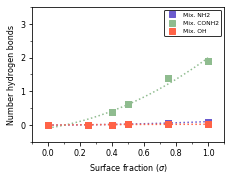

In [4]:
## FIGURE FILE
fig_name = r"sam_sam_number_hbonds_mixed"
## FIGURE OUT PATH
fig_path = os.path.join( manuscript_dir,
                         figure_dir,
                         fig_name )
# fig_path = None

## IMPORT MATPLOTLIB
from matplotlib import cm

## CUSTOMIZE COLORBAR 
colors = [ "slateblue", "darkseagreen", "tomato" ]

## PLOT LINE
plot_line_points( x*len(labels), y,
                  yerr         = yerr,
                  xlabel       = r"Surface fraction ($\sigma$)",
                  ylabel       = r"Number hydrogen bonds",
                  xticks       = [ 0.0, 1.0, 0.2 ],
                  yticks       = [ 0.0, 3.0, 1 ],
                  fit_line     = fit,
                  colors       = colors,
                  point_labels = labels,
                  legend_cols  = 1,
                  fig_path     = fig_path, )
